<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

## **Mini Project 2** - EDA and Classification

In [42]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,roc_curve, auc
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [27]:
# Import csv file and convert to dataframe

data = 'C:/Users/cdaniels/OneDrive - The University of Waikato/Documents/IOD/Data/kidney_disease.csv'
df = pd.read_csv(data)
df = df.set_index("id")
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
id,,,,,,,,,,,,,,,,,,,,,
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [28]:
# Determine shape and format of the data

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             330 non-null    object 
 16  wc              295 non-null    object 
 17  rc              270 non-null    object 


In [29]:
# Determine the unique values for columns of data type object, for encoding

for column in df.select_dtypes(include=['object']).columns:
    print(f"Unique values in {column}: {df[column].unique()}")

Unique values in rbc: [nan 'normal' 'abnormal']
Unique values in pc: ['normal' 'abnormal' nan]
Unique values in pcc: ['notpresent' 'present' nan]
Unique values in ba: ['notpresent' 'present' nan]
Unique values in pcv: ['44' '38' '31' '32' '35' '39' '36' '33' '29' '28' nan '16' '24' '37' '30'
 '34' '40' '45' '27' '48' '\t?' '52' '14' '22' '18' '42' '17' '46' '23'
 '19' '25' '41' '26' '15' '21' '43' '20' '\t43' '47' '9' '49' '50' '53'
 '51' '54']
Unique values in wc: ['7800' '6000' '7500' '6700' '7300' nan '6900' '9600' '12100' '4500'
 '12200' '11000' '3800' '11400' '5300' '9200' '6200' '8300' '8400' '10300'
 '9800' '9100' '7900' '6400' '8600' '18900' '21600' '4300' '8500' '11300'
 '7200' '7700' '14600' '6300' '\t6200' '7100' '11800' '9400' '5500' '5800'
 '13200' '12500' '5600' '7000' '11900' '10400' '10700' '12700' '6800'
 '6500' '13600' '10200' '9000' '14900' '8200' '15200' '5000' '16300'
 '12400' '\t8400' '10500' '4200' '4700' '10900' '8100' '9500' '2200'
 '12800' '11200' '19100' '\t?

In [30]:
#Replace non-numeric values in columns with majority numeric values to null values

df['pcv'] = pd.to_numeric(df['pcv'],errors='coerce')
df['wc'] = df['wc'].replace({'\t6200': '6200', '\t8400': '8400', '\t?': np.nan}).astype(float)
df['rc'] = pd.to_numeric(df['pcv'],errors='coerce')
df['dm'] = df['dm'].replace({'\tno': 'no', '\tyes': 'yes'}).str.strip()
df['cad'] = df['cad'].replace({'\tno': 'no'})
df[['htn','dm','cad','pe','ane']] = df[['htn','dm','cad','pe','ane']].replace(to_replace={'yes':1.0,'no':0.0})
df[['rbc','pc']] = df[['rbc','pc']].replace({'abnormal':1.0,'normal':0.0})
df[['pcc','ba']] = df[['pcc','ba']].replace({'present':1.0,'notpresent':0.0})
df[['appet']] = df[['appet']].replace({'good':1.0,'poor':0.0})
df['classification'] = df['classification'].replace({'ckd':1.0,'ckd\t':1.0,'notckd':0.0})

In [31]:
# Confirm all columns are numeric for machine learning

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    float64
 6   pc              335 non-null    float64
 7   pcc             396 non-null    float64
 8   ba              396 non-null    float64
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             329 non-null    float64
 16  wc              294 non-null    float64
 17  rc              329 non-null    float64


In [32]:
# Rename classification to class

df.rename(columns={'classification':'class'},inplace=True)

In [33]:
# Determine the proportion of null values

total_rows = len(df)
null_proportion =(df.isnull().sum() / total_rows * 100).round(2)
print(null_proportion.astype(str) + '%')

age       2.25%
bp         3.0%
sg       11.75%
al        11.5%
su       12.25%
rbc       38.0%
pc       16.25%
pcc        1.0%
ba         1.0%
bgr       11.0%
bu        4.75%
sc        4.25%
sod      21.75%
pot       22.0%
hemo      13.0%
pcv      17.75%
wc        26.5%
rc       17.75%
htn        0.5%
dm         0.5%
cad        0.5%
appet     0.25%
pe        0.25%
ane       0.25%
class      0.0%
dtype: object


In [34]:
# Due to the high proportion of random nulls, the Iterative Imputer class from sklearn was used to impute the null values and a new dataframe, df_imputed, was created.

# Initialize the IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)

# Perform the imputation on your DataFrame
df_imputed = imp.fit_transform(df)

# Convert the result back into a DataFrame
df_imputed = pd.DataFrame(df_imputed, columns=df.columns)

In [35]:
# Summary statistics of data set

df_imputed.describe().T

,count,mean,std,min,25%,50%,75%,max
age,400.0,51.504228,16.980473,2.000000,42.00000,54.000000,64.000000,90.000000
bp,400.0,76.418578,13.491373,50.000000,70.00000,80.000000,80.000000,180.000000
sg,400.0,1.017092,0.005607,0.998263,1.01306,1.015614,1.020000,1.025000
al,400.0,1.078725,1.315596,-0.190997,0.00000,0.000000,2.000000,5.000000
su,400.0,0.466263,1.072820,-0.549922,0.00000,0.000000,0.000000,5.000000
rbc,400.0,0.222553,0.328407,-0.063311,0.00000,0.000000,0.315606,1.309561
pc,400.0,0.228512,0.391240,-0.138824,0.00000,0.000000,0.308491,1.000000
pcc,400.0,0.104818,0.307021,-0.046913,0.00000,0.000000,0.000000,1.000000
ba,400.0,0.054921,0.228287,-0.013902,0.00000,0.000000,0.000000,1.000000
bgr,400.0,148.803246,77.346099,22.000000,100.00000,122.000000,169.000000,490.000000


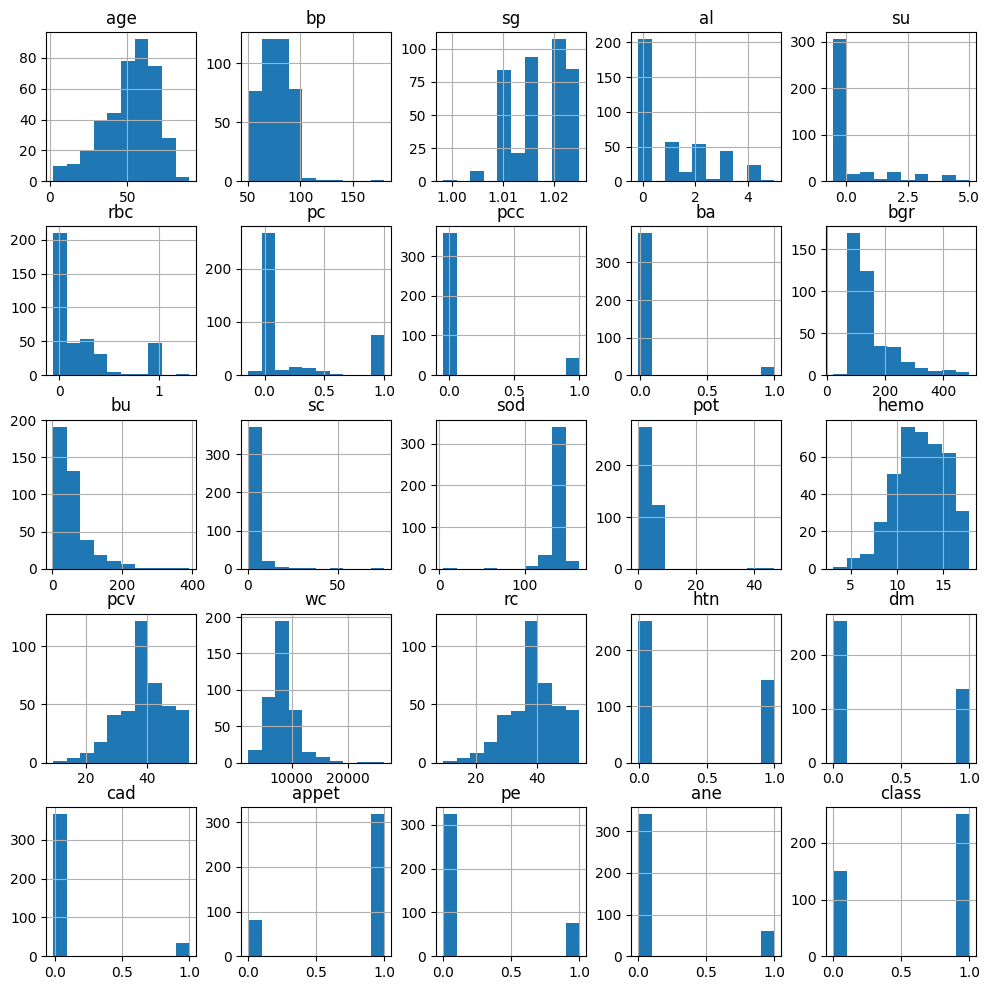

In [36]:
# Distribution of the data

df_imputed.hist(figsize=(12,12))
plt.show()

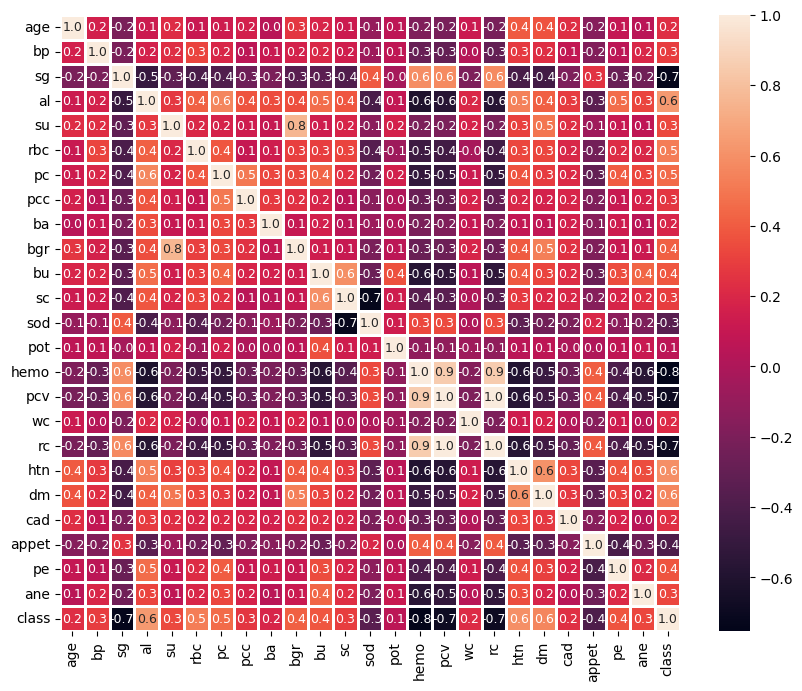

In [48]:
# Correlation matrix of features

plt.figure(figsize=(10, 8))
sns.heatmap(df_imputed.corr(numeric_only=True),annot=True,fmt=".1f",annot_kws={"fontsize": 9},linewidths=1)
plt.show()